<a href="https://colab.research.google.com/github/ardayekh/ProfessionalDataEngineer/blob/main/Modernizing_Data_Lakes_and_Data_Warehouses_with_GCP_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="red">**--------------------[Week2 - Day1]--------------------**

<font color="green">**Video#1: The Modern Data Warehouse**

- for an analyst to query data from the warehouse, they would need to know the schema as data in warehouse should have a scehma unlike data in the lake
- Data in the warehouse should be optimized for querying
- Modern data warehouse should have the folloiwng characteristics

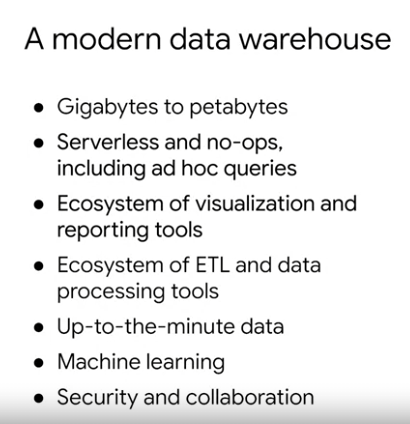

<font color="green">**Video#2: Intro to Big Query**

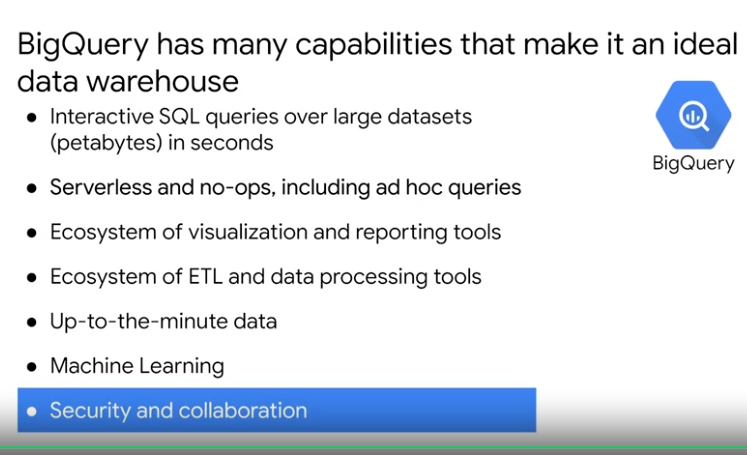

<font color='green'>**Video#3: Demo: Querying TB of Data in seconds**

Demoed the github demo in the following link:

https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/data-engineering/demos/bigquery_scale.md

<font color='green'>**Video#4: Getting Started**
- Inside BigQuery, datasets are created to group tables having same access control
- Access at the dataset level is mamnaged by IAM
- Storage costs are build to project owning the dataset (in case of the goolge public dataset, storage is billed to Google) while query charges are billed to project running the query
- Every table has a schema, you can enter the schema manually through the GCP console or by supplying a JSON file
- BigQuery Security an dencryption are similar to Cloud Storage as follows

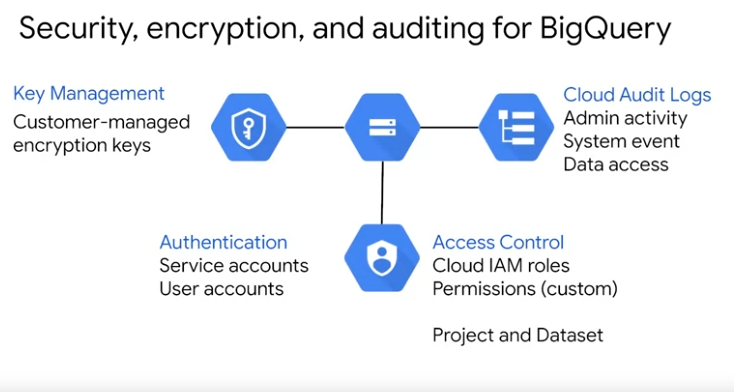

- If you want to give access to specific tables within a dataset, or a subset of a table within it, you can use views where you can create a view for the table/subset of the table and store them in a separate dataset.
- For this to work, both datasets must be within the same region/multi regions
- you can also use materlialized views to persist the data (to keep the data fresh and up to date without running the view query again)
- data cannot be exported from views
- The BigQuery query service is separate from the BigQuery storage service, however, they're designed to collaborate and be used together.
- Querying native tables is the most common case and the most performant way to use BigQuery. BigQuery is most efficient when working with data contained in its own storage service, the storage service and the query service work together to internally organize the data to make queries efficient over huge datasets of terabytes and petabytes in size.
- The query service can also run query jobs on data contained in other locations such as tables in CSV files hosted on cloud storage.
So you can query data and external tables or from external sources without loading it into BigQuery, these are called Federated queries.
- query service puts the results into a temporary table and the user interface pulls and displays the data in the temporary table. This temporary table is stored for 24 hours, so if you run the exact same query again, and if the results would not be different then BigQuery will simply return a pointer to the cached results.
- Queries that can be served from the cache do not incur any charges.

<font color='green'>**Video#4: Loading Data**
- EL, ELT & ETL three types of loading data
- A load job creates a destination table if one doesn't already exist
- BigQuery determines the data schema as follows. If your data is an Avro format, which is self-describing BigQuery can determine the schema directly, if the data is in JSON or CSV format BigQuery can auto detect the schema, but manual verification is recommended.
- You can also specify a schema explicitly bypassing the schema in as an argument to the load job.
- BigQuery can import data stored in the JSON format so long as it's a new line delimited. It can also import files in Avro, parquet and RC, the most common import is with CSV files which are the bridge between BigQuery and spreadsheets. BigQuery can also directly import firestore and datastore export files.
- Another way that BigQuery can import data is through the API, basically any place where you can get code to run can theoretically insert data into BigQuery tables.
- You could use the API from a compute engine instance, a container on Kubernetes, app engine, or from cloud functions. However, you'd have to recreate the data processing foundation in these cases. In practice the API is mainly used from either cloud data proc or cloud dataflow.
- The data transfer service or DTS provides connectors and pre-built BigQuery load jobs that perform the transformations necessary to load report data, from various business services directly into BigQuery. 

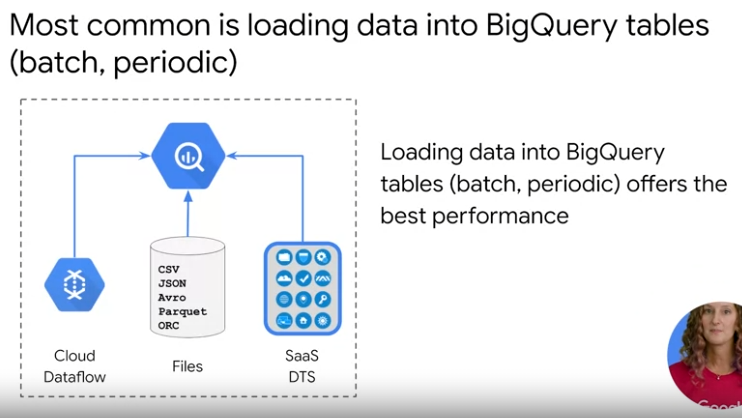

- You can schedule queries to run on a recurring basis, scheduled queries must be written in standard SQL, which can include data definition language, and data manipulation language statements.
- You can recover a deleted file only if another table with the same ID in the dataset has not been created. In particular, this means you cannot recover a deleted table if it's being streamed into.


#<font color="red">**--------------------[Week2 - Day2]--------------------**

<font color='green'>**Video#1: Demo: Exploring Schemas**
- Querying and converting table metadata

SELECT
  dataset_id,
  table_id,
  ROUND(size_bytes/POW(10,9),2) AS size_gb,
  TIMESTAMP_MILLIS(creation_time) AS creation_time,
  TIMESTAMP_MILLIS(last_modified_time) AS last_modified_time,
  row_count,
  CASE
    WHEN type = 1 THEN 'table'
    WHEN type = 2 THEN 'view'
  ELSE
  NULL
END
  AS type
FROM
  `bigquery-public-data.world_bank_intl_debt.__TABLES__`

<font color='green'>**Video#2: Demo: Exploring Schemas**

- Metadata queries

SELECT
  dataset_id,
  table_id,
  ROUND(size_bytes/POW(10,9),2) AS size_gb,
  TIMESTAMP_MILLIS(creation_time) AS creation_time,
  TIMESTAMP_MILLIS(last_modified_time) AS last_modified_time,
  row_count,
  CASE
    WHEN type = 1 THEN 'table'
    WHEN type = 2 THEN 'view'
  ELSE
  NULL
END
  AS type
FROM
  `bigquery-public-data.new_york_taxi_trips.__TABLES__`

--------------

SELECT * FROM `bigquery-public-data.new_york_taxi_trips.INFORMATION_SCHEMA.COLUMNS`
--Options
--WHERE table_name = "tlc_yellow_trips_2016"
WHERE  is_partitioning_column = "yes"

<font color='green'>**Video#2: Schema Design**
- Normalized vs denormalizaed

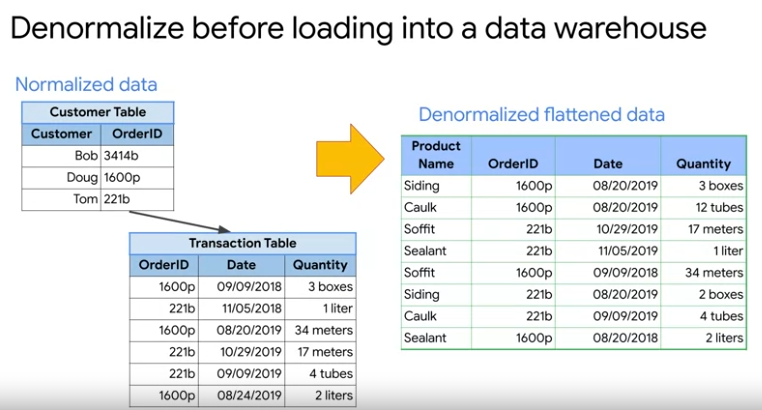

- You would usually denormalized data before loading it into BigQuery. However, there are cases where denormalizing data is bad for performance. Specifically, if you have to group by a column with a one too many relationships. In this example shown, OrderID is such a column.
- Using nested field can resolve this performance issue

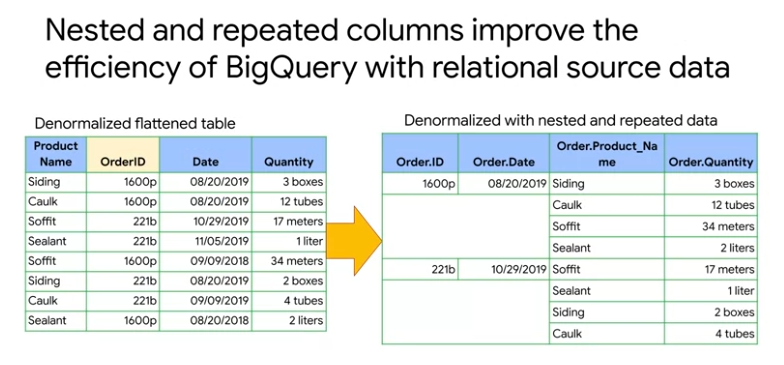

<font color='green'>**Video#3: Nested and Repeated Fields**
- For relational schemas, often the most intensive computational workloads are JOINs across very large tables.
- The alternative has different drawbacks, prejoining all your tables into one massive table makes reading data faster, but now you have to be really careful if you have data at different levels of granularity. This means that one order will be recorded separately for each event (such as driver confirmed, customer dropped off etc.) and this may cause you to duplicate orders in aggregate queries
- One common solution in an Enterprise data warehouse schemas is to take advantage of nested and repeated data fields. You can have one row for each order and repeated values within that one row for data that is at a more granular level
- Nested fields example below

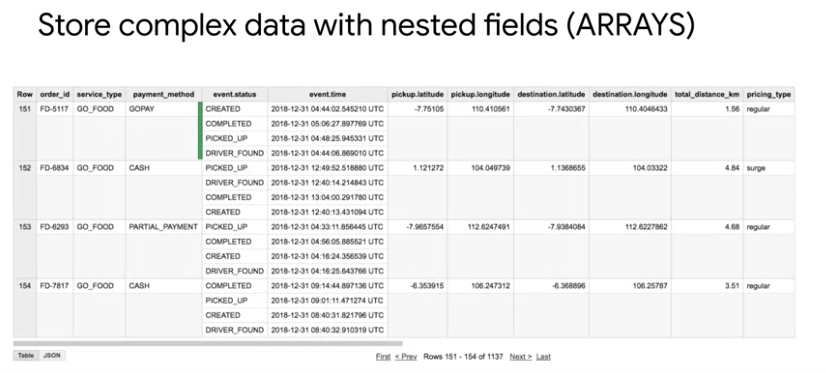

- Event pick up and destination are what are called struct or structure type data fields in SQL.
- Struct fields have data type as "RECORD"
- When Mode = 'REPEATED" it means it is an array
- Arrays and Structs can be used independently of each other

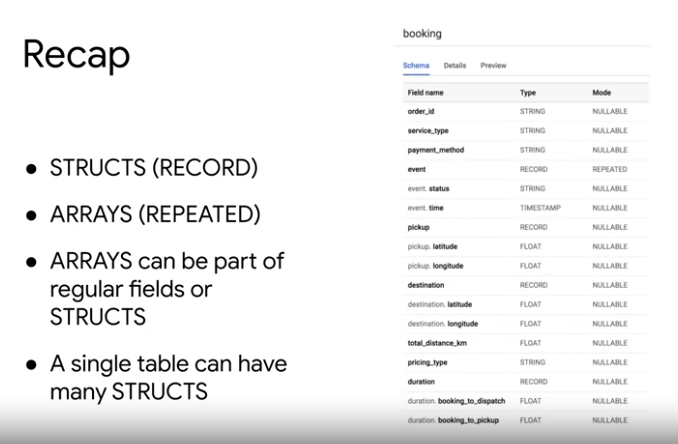


<font color='green'>**Video#4: Demo: Nested and Repeated Fields**

- Follow demo at: https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/data-engineering/demos/nested.md

- When querying nested fields (arrays) you have to un-nest them first (having the values in different rows) before querying otherwise you will get an error
- You this with the unnest command as in the query below

In [ ]:
SELECT DISTINCT
  block_id, 
  TIMESTAMP_MILLIS(timestamp) AS timestamp,
  t.transaction_id,
  t_outputs.output_satoshis AS satoshi_value,
  t_outputs.output_satoshis * 0.00000001 AS btc_value
FROM `cloud-training-demos.bitcoin_blockchain.blocks` AS b
  , b.transactions AS t 
  , t.inputs as i
  , UNNEST(t.outputs) AS t_outputs
ORDER BY btc_value DESC
LIMIT 10;

Lab:
This lab is an in-depth walkthrough of working with semi-structured data (ingesting JSON, Array data types) inside of BigQuery. Denormalizing your schema into a single table with nested and repeated fields can yield performance improvements, but the SQL syntax for working with array data can be tricky. You will practice loading, querying, troubleshooting, and unnesting various semi-structured datasets.

Objectives
In this lab, you learn about the following:

Loading semi-structured JSON into BigQuery

Creating and querying arrays

Creating and querying structs

Querying nested and repeated fields

An easier way to interpret the Fruit array:

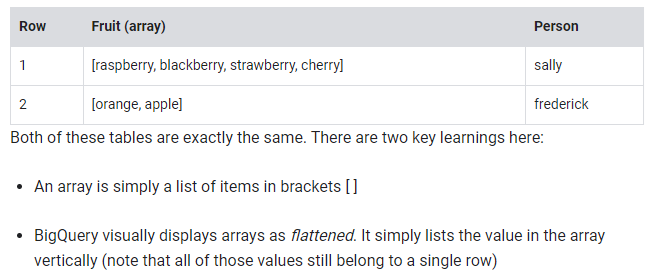

In [ ]:
#use the ARRAY_AGG() function to aggregate our string values into an array

#Query to explore a public table with repeated IDs
SELECT
  fullVisitorId,
  date,
  v2ProductName,
  pageTitle
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
ORDER BY date

#Query to aggregate our string values into an array
SELECT
  fullVisitorId,
  date,
  ARRAY_AGG(v2ProductName) AS products_viewed,
  ARRAY_AGG(pageTitle) AS pages_viewed
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
GROUP BY fullVisitorId, date
ORDER BY date

#Query to count array ements using ARRAY_LENGTH()
SELECT
  fullVisitorId,
  date,
  ARRAY_AGG(v2ProductName) AS products_viewed,
  ARRAY_LENGTH(ARRAY_AGG(v2ProductName)) AS num_products_viewed,
  ARRAY_AGG(pageTitle) AS pages_viewed,
  ARRAY_LENGTH(ARRAY_AGG(pageTitle)) AS num_pages_viewed
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
GROUP BY fullVisitorId, date
ORDER BY date

#Use DISTINCT with ARRAY_AGG() to get count of distinct ARRAY ELEMENTS
SELECT
  fullVisitorId,
  date,
  ARRAY_AGG(DISTINCT v2ProductName) AS products_viewed,
  ARRAY_LENGTH(ARRAY_AGG(DISTINCT v2ProductName)) AS distinct_products_viewed,
  ARRAY_AGG(DISTINCT pageTitle) AS pages_viewed,
  ARRAY_LENGTH(ARRAY_AGG(DISTINCT pageTitle)) AS distinct_pages_viewed
  FROM `data-to-insights.ecommerce.all_sessions`
WHERE visitId = 1501570398
GROUP BY fullVisitorId, date
ORDER BY date

Recap

You can do some pretty useful things with arrays like:

finding the number of elements with ARRAY_LENGTH(<array>)
deduplicating elements with ARRAY_AGG(DISTINCT <field>)
ordering elements with ARRAY_AGG(<field> ORDER BY <field>)
limiting ARRAY_AGG(<field> LIMIT 5)

In [ ]:
#Before we can query REPEATED fields (arrays) normally, you must first break the arrays back into rows.
#Do that by using the UNNEST() function on your array field
SELECT DISTINCT
  visitId,
  h.page.pageTitle
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`,
UNNEST(hits) AS h
WHERE visitId = 1501570398
LIMIT 10

-You need to UNNEST() arrays to bring the array elements back into rows
-UNNEST() always follows the table name in your FROM clause (think of it conceptually like a pre-joined table)
-You need to UNNEST() arrays to bring the array elements back into rows
UNNEST() always follows the table name in your FROM clause (think of it conceptually like a pre-joined table)
-A STRUCT can have:

  - one or many fields in it
  - the same or different data types for each field
  - it's own alias

In [ ]:
#The .* syntax tells BigQuery to return all fields for that STRUCT (much like it would if totals.* was a separate table we joined against)
SELECT
  visitId,
  totals.*,
  device.*
FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE visitId = 1501570398
LIMIT 10

gain significant performance advantages by avoiding 32 table JOINs
get granular data from ARRAYs when you need it but not be punished if you dont (BigQuery stores each column individually on disk)
have all the business context in one table as opposed to worrying about JOIN keys and which tables have the data you need

In [ ]:
#standardSQLCan you think of what two word SQL command you would use to correlate the 800M race with each of the racers in the first table?

SELECT race, participants.name
FROM racing.race_results
CROSS JOIN
race_results.participants # full STRUCT name

#You can simplify the last query by:
#Adding an alias for the original table
#Replacing the words "CROSS JOIN" with a comma (a comma implicitly cross joins)

SELECT race, participants.name
FROM racing.race_results AS r, r.participants

#<font color="red">**--------------------[Week2 - Day3]--------------------**

<font color='green'>**Video#1: Optimizing with Partitioning and Clustering**
- One of the ways you can optimize the tables in your data warehouse is to reduce the cost and amount of data read by partitioning your tables.
- BigQuery will then change its internal Storage so the dates are stored in separate shards, and a table partitioned by a date or timestamp column.
- When the data is stored BigQuery ensures that all the data in a block belongs to a single partition. A partition table maintains these properties across all operations that modify it. Query jobs, DML statements, DDL statements, Load jobs, and copy jobs. This requires BigQuery to maintain more metadata than a non partitioned table
-As the number of partitions increases, the amount of metadata overhead increases. When you do a query with the where clause that looks for dates between January 3rd and 4th, BigQuery will have to read only two-fifths of the full data-set.
- Partitioning can be set by ingestion time on a date time column or a based on a range of an integer column.

In [ ]:
# Here we're partitioning customer ID and the range 0-100 in increments of 10
bq mk --table --schema "customer_id:integer,customer_name:string" 
--range_partitioning = customer_id,0,100,10 my_dataset.my_table


- good practice is to acquire the queries always include the partition filter. Make sure that the partition field is isolated on the left side because that's the only way that BigQuery can quickly discard unnecessary partitions.

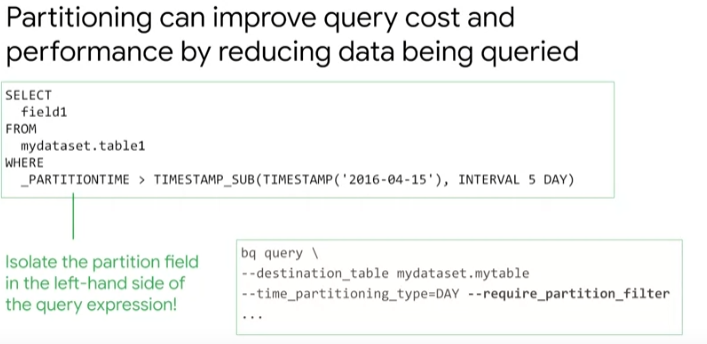

- Further improvement to query performance can be achieved by clustering columns
- clustering columns means bringing rows containg the same value in a particular column together (can be thought of as sorting based on a column value)
- clustering is best done on high cardinality firlds (fields with low repittition in value (the lower the cardinality the more duplicated elements in a column))
- clustering typically is done at table creation using the Cluster By column_name key word
- Clustering can be done on multiple columns
- When you cluster a table using multiple columns, the order of columns you specify is important.
- Over time, as more and more operations modify a table, the degree to which the data is sorted begins to weaken and the data becomes only partially sorted whcih requires you to re-cluster
- You can re-cluster the data in the entire table by running a select star query that selects from and overwrites the table.
- when clustering multiple columns, the order of the columns matter
- how you establish your clustering columns depends on how you forsee users querying the data most often
- BigQuery periodically does auto re-clustering for you automatically without needing anything to enable it.

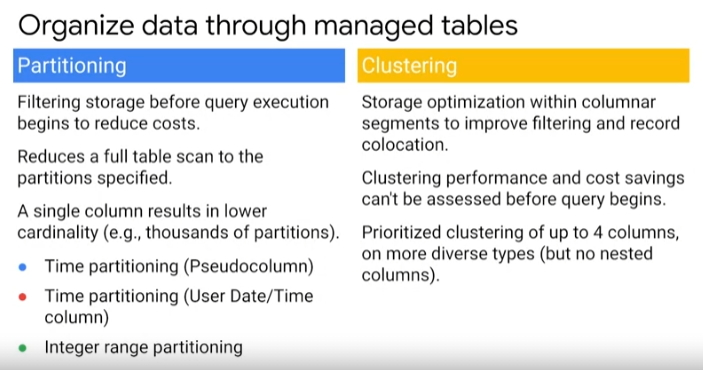

<font color='green'>**Video#2&3: Demo: Creating Partitioned Tables & Demo: Partitioning and Clustering**

- Demo 1: Following demo in github repo: training-data-analyst/courses/data-engineering/demos/partition.md
- Demo 2: Following demo in github repo: training-data-analyst/courses/data-engineering/demos/clustering.md


<font color='green'>**Intro to BigQuery System Table Reports**
- Cloud monitoring and BigQuery UI can be used to monitor slot/resource/reservation and job usage
- Additionally, information_schema metadata tables can be queried to get detail info about jobs
- BigQuery System Table Reports help visualize the data inside the INFORMATION_SCHEMA metadata tables

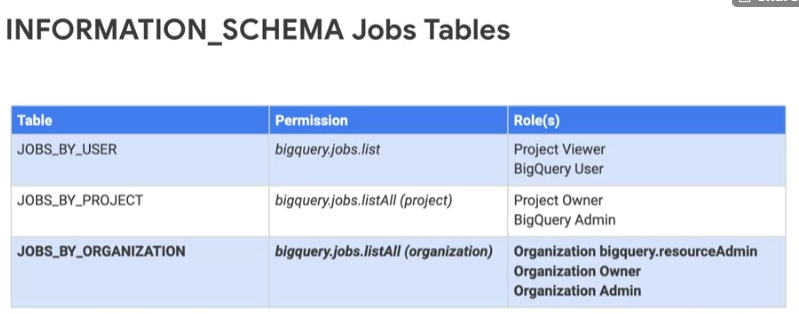

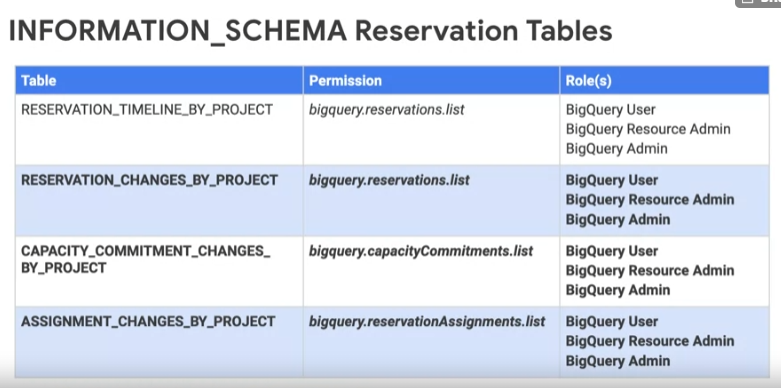

- Key INFORMATION_SCHEMA tables and fields below

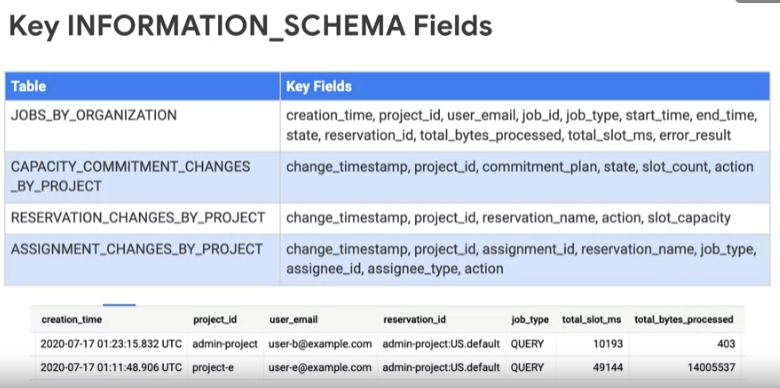

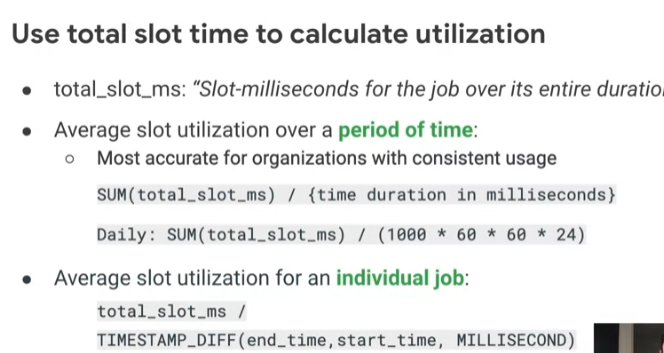

- Types of pre-built Public Studion reports

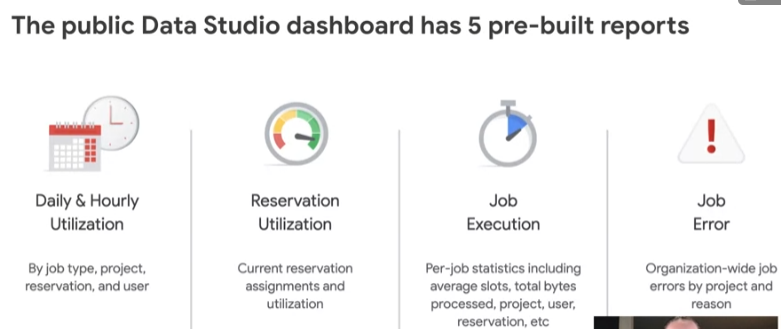

<font color='green'>**Video#5: Demo: BigQuery System Tables with Data Studio**

-Demo URL: https://datastudio.google.com/reporting/c30ea9f1-31d4-401a-8ab7-b3f869b75d29/page/RCUSB?s=lUZe6CZi5_s